In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Loading the .mat file
from scipy.io import loadmat
data = loadmat("Indian_pines_corrected.mat")               
print(data.keys())                            #cheking what variables are inside the file 
                                              #the actual hyperspectral cube is stored in "indian_pines_corrected"

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])


In [2]:
#Extracting the hyperspectral cube
cube = data['indian_pines_corrected']
print(cube.shape)

(145, 145, 200)


In [3]:
def convolve(image, kernel):
    image = image.astype(np.float32)

    #kernel dimensions
    k_h, k_w = kernel.shape
    pad_h = k_h//2
    pad_w = k_w//2

    #output image
    output = np.zeros_like(image)  #Creates a new image filled with zeros, with the same shape and type as the original image.

    # padding image to handle borders
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    #performing convolution manually
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region*kernel)

    return output

Mean filter (3x3 smoothing)

In [4]:
mean_kernel = np.ones((3,3), dtype=np.float32) / 9.0

Horizontal Sobel (detects vertical edges)

In [5]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)


Vertical Sobel (detects horizontal edges)

In [6]:
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


In [7]:
# Applying filters to a single band
band_50 = cube[:, :, 50]

smoothed_50 = convolve(band_50, mean_kernel)
edge_x_50 = convolve(band_50, sobel_x)
edge_y_50 = convolve(band_50, sobel_y)
edges_50 = np.sqrt(edge_x_50**2 + edge_y_50**2)

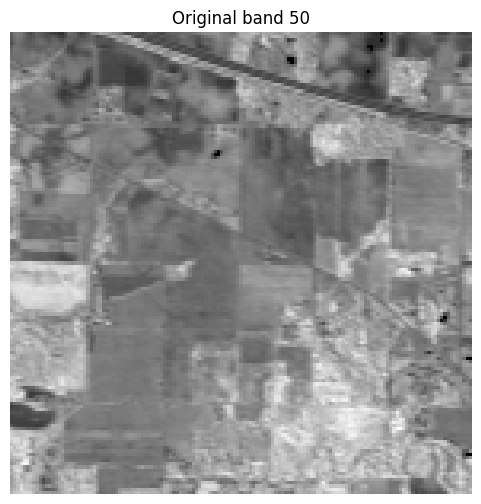

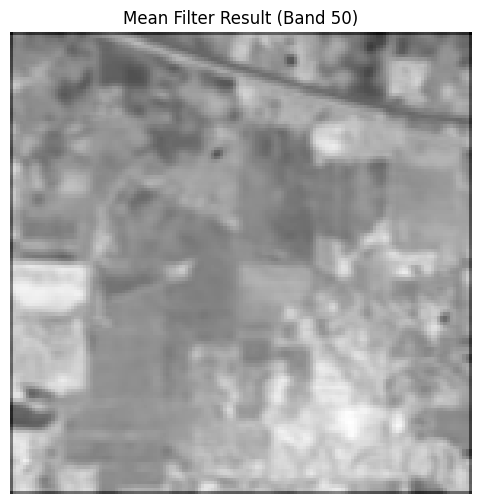

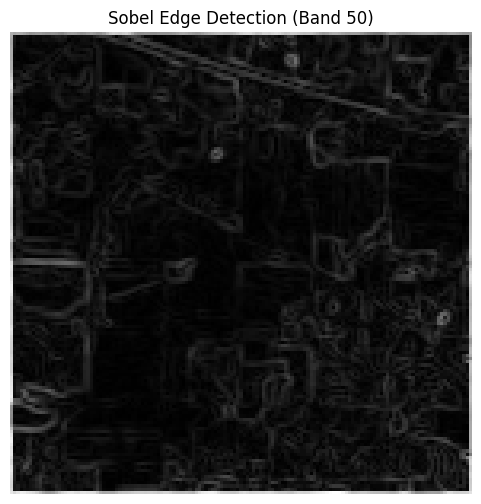

In [8]:
plt.figure(figsize=(6,6))
plt.title("Original band 50")
plt.imshow(band_50, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Mean Filter Result (Band 50)")
plt.imshow(smoothed_50, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Sobel Edge Detection (Band 50)")
plt.imshow(edges_50, cmap='gray')
plt.axis('off')

plt.show()

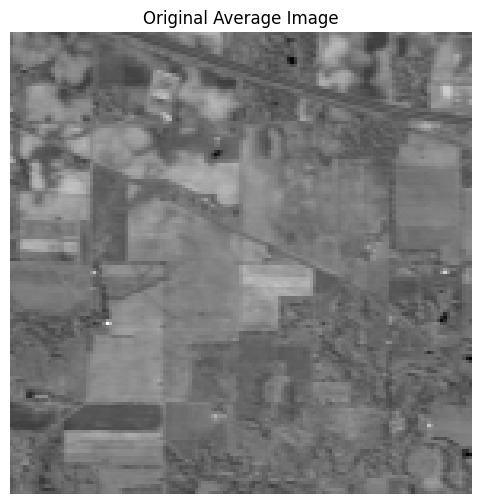

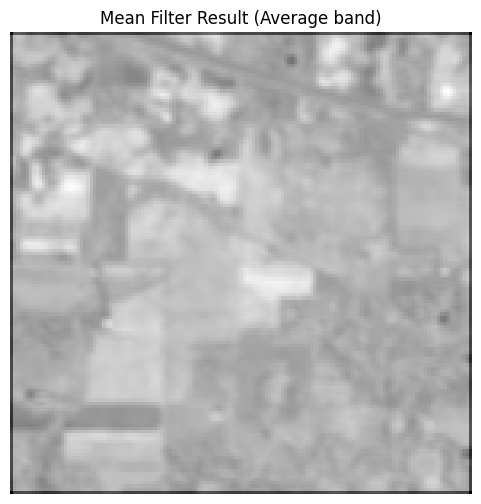

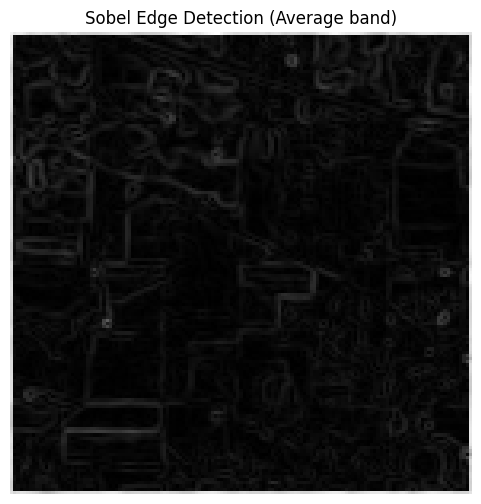

In [11]:
# Applying filters to average image
avg_image = np.mean(cube, axis=2)

smoothed_avg = convolve(avg_image, mean_kernel)
edge_x_avg = convolve(avg_image, sobel_x)
edge_y_avg = convolve(avg_image, sobel_y)
edges_avg = np.sqrt(edge_x_avg**2 + edge_y_avg**2)

plt.figure(figsize=(6,6))
plt.title("Original Average Image")
plt.imshow(avg_image, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Mean Filter Result (Average band)")
plt.imshow(smoothed_avg, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Sobel Edge Detection (Average band)")
plt.imshow(edges_avg, cmap='gray')
plt.axis('off')

plt.show()
